In [85]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Importing the dataset
dataset = pd.read_csv("train.csv")
dataset.head()

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [87]:
#to check for missing values
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


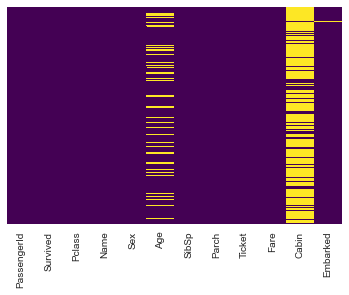

In [88]:
#to check for missing values using heatmap
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

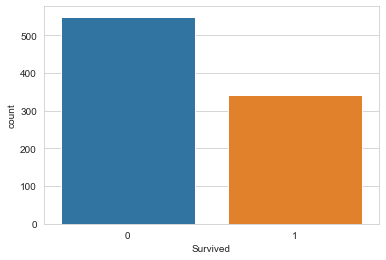

In [89]:
#to check how many people survived
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=dataset)

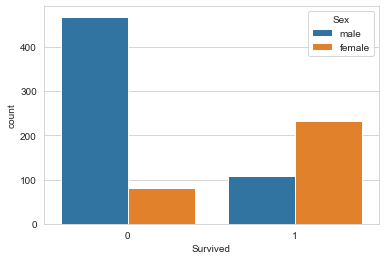

In [90]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=dataset)

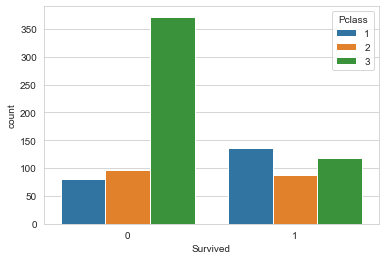

In [91]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=dataset)

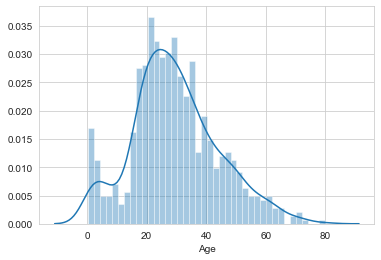

In [92]:
sns.distplot(dataset['Age'].dropna(),bins=40)

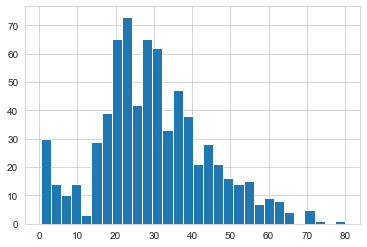

In [93]:
dataset['Age'].hist(bins=30)

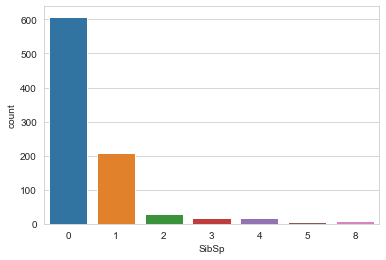

In [94]:
sns.countplot(x="SibSp",data=dataset)

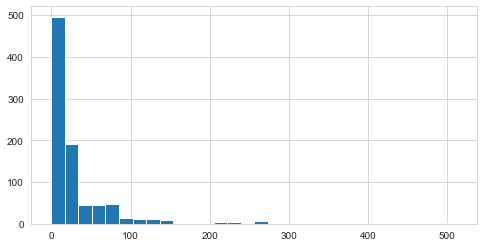

In [95]:
dataset["Fare"].hist(bins=30,figsize=(8,4))

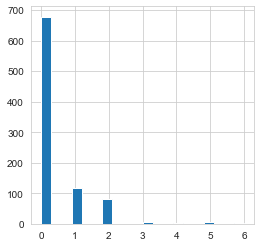

In [96]:
dataset["Parch"].hist(bins=20,figsize=(4,4))

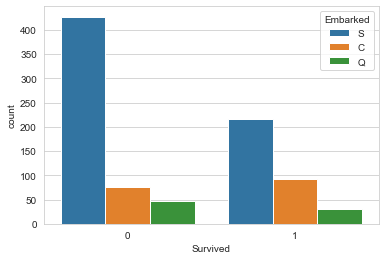

In [97]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Embarked",data=dataset)

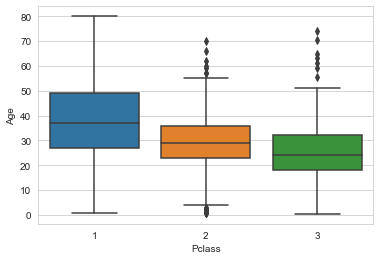

In [98]:
#Data Clean
#Remove null values

sns.boxplot(x="Pclass",y="Age",data=dataset)

In [99]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [100]:
dataset["Age"]=dataset[["Age","Pclass"]].apply(impute_age,axis=1)

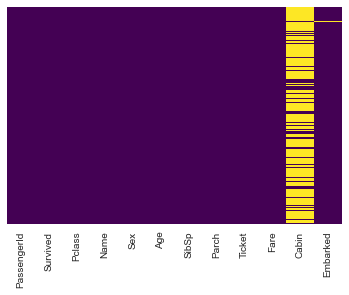

In [101]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [102]:
dataset.drop("Cabin",axis=1,inplace=True)

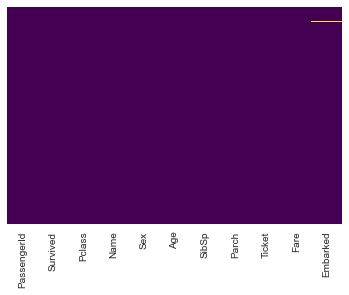

In [103]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [104]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [105]:
#working with categorical variable

In [106]:
pd.get_dummies(dataset['Embarked'],drop_first=True).head()   #to avoid dummy variable trap, we drop first column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [107]:
pd.get_dummies(dataset['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [108]:
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
sex = pd.get_dummies(dataset['Sex'],drop_first=True)

In [109]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [110]:
dataset.drop(['PassengerId'],axis=1,inplace=True)

In [111]:
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [112]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [113]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [114]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [115]:
#Building a Machine Learning Model

In [116]:
#train test split

In [117]:
dataset.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [118]:
dataset['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1),
                                                    dataset['Survived'], test_size=0.30,
                                                    random_state=1)

In [121]:
#importing model

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [124]:
predictions = logmodel.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
accuracy = confusion_matrix(y_test,predictions)

In [127]:
accuracy

array([[132,  21],
       [ 35,  80]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7910447761194029

In [130]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)